In [2]:
import pandas as pd
import numpy as np

!git clone https://github.com/charishmacherry/ML_assign2.git

fatal: destination path 'ML_assign2' already exists and is not an empty directory.


In [5]:
dataset = pd.read_csv('ML_assign2/Iris.csv')
dataset['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
df = iris.data
sepal_length = df.T[0]
sepal_width = df.T[1]
petal_length = df.T[2]
petal_width = df.T[3]

X,Y = iris.data,iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
from math import sqrt

#mean of all the features
sepal_length_mean = sum(dataset['SepalLengthCm']) / float(len(dataset['SepalLengthCm']))
sepal_width_mean = sum(dataset['SepalWidthCm']) / float(len(dataset['SepalWidthCm']))
petal_length_mean = sum(dataset['PetalLengthCm']) / float(len(dataset['PetalLengthCm']))
petal_width_mean = sum(dataset['PetalWidthCm']) / float(len(dataset['PetalWidthCm']))

#Std for the features
sepal_length_var = sqrt(sum([(x - sepal_length_mean)**2 for x in dataset['SepalLengthCm']]) / float(len(dataset['SepalLengthCm']) - 1))
sepal_width_var = sqrt(sum([(x - sepal_width_mean)**2 for x in dataset['SepalWidthCm']]) / float(len(dataset['SepalWidthCm']) - 1))
petal_length_var = sqrt(sum([(x - petal_length_mean)**2 for x in dataset['PetalLengthCm']]) / float(len(dataset['PetalLengthCm']) - 1))
petal_width_var = sqrt(sum([(x - petal_width_mean)**2 for x in dataset['PetalWidthCm']]) / float(len(dataset['PetalWidthCm']) - 1))

summary = [(sepal_length_mean, sepal_width_mean, petal_length_mean, petal_width_mean, len(dataset)),(sepal_length_var, sepal_width_var, petal_length_var, petal_width_var, len(dataset))]
#print(summary)

#separate by class
def seperate_by_class(dataset):
  setosa = dataset[dataset['Species'] == "Iris-setosa"]
  versicolor = dataset[dataset['Species'] == "Iris-versicolor"]
  virginica = dataset[dataset['Species'] == "Iris-virginica"]
  return setosa, versicolor, virginica

def mean_std_each_class(dataset):
  setosa, versicolor, virginica = seperate_by_class(dataset)
  mean_each_class = {}
  std_each_class = {}
  di ={"Iris-setosa":setosa,"Iris-versicolor":versicolor,"Iris-virginica":virginica}

  for key, value in di.items():
    for j in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
      mean_each_class[key+'_'+str(j)] = sum(value[j].values) / float(len(value[j].values))
      std_each_class[key+'_'+str(j)] = sqrt(sum([(x - mean_each_class[key + '_'+str(j)])**2 for x in value[j].values]) / float(len(value[j])-1))
  return mean_each_class,std_each_class

# setosa:[(slm, slv, len(d)), (swm,swv,len(d)),(plm,pwv,len(d)),(pwm,pwv,len(d))]
def summarize_each_class(dataset):
  mean_each_class, std_each_class = mean_std_each_class(dataset)
  di={}
  for target_class_name in ["Iris-setosa","Iris-versicolor","Iris-virginica"]:
    li = []
    for j in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
      li.append((mean_each_class[target_class_name+'_'+j],std_each_class[target_class_name+'_'+j],int(len(dataset)/3))) #3 refers to number of classes
    di[target_class_name] = li
  return di

def naive_bayes(dataset):
  summaries = summarize_each_class(dataset)
  return summaries

In [8]:
from math import sqrt
from math import exp
from math import pi
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

In [17]:
def create_train_test(dataset):
    spli=[]
    for i in range(50):
        if i <30:
            spli.append('train')
        else:
            spli.append('test')

    setosa, versicolor, virginica = seperate_by_class(dataset)
    setosa['split']=spli
    versicolor['split']=spli
    virginica['split']=spli

    df = pd.DataFrame()
    df = df.append([setosa,versicolor,virginica])
    return df

In [18]:
df = create_train_test(dataset) 
df['split'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: Se

train    90
test     60
Name: split, dtype: int64

In [19]:
train = df[df['split']=='train']
test = df[df['split']=='test']
train = train.drop(['split','Id'], axis=1)
test = test.drop(['split','Id'], axis=1)

In [20]:
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,4.8,3.1,1.6,0.2,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa


In [21]:
test = test.reset_index()
test = test.drop(['index'],axis=1)

test_actual = test['Species'].values
len(test_actual)

# test = test.drop(['Species'],axis=1)
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.8,3.1,1.6,0.2,Iris-setosa
1,5.4,3.4,1.5,0.4,Iris-setosa
2,5.2,4.1,1.5,0.1,Iris-setosa
3,5.5,4.2,1.4,0.2,Iris-setosa
4,4.9,3.1,1.5,0.1,Iris-setosa


In [22]:
train.shape,test.shape

((90, 5), (60, 5))

In [23]:
summaries = naive_bayes(train)

In [24]:
def predict(summaries,lis):
  probabilities = calculate_class_probabilities(summaries, lis)
  max_value = max(probabilities.values())  # maximum value
  max_keys = [k for k, v in probabilities.items() if v == max_value] # getting all keys containing the `maximum`
  return max_keys[0],max_value

In [33]:
predicted = [];predicted_prob=[]
for i in range(len(test)):
  res, prob = predict(summaries ,test.iloc[i].values)
  predicted.append(res)
  predicted_prob.append(prob)

In [26]:
def accuracy(test_set, predicted):
    correct = 0
    actual = test_set
    for x, y in zip(actual, predicted):
        if x == y:
            correct += 1
    return correct / float(len(test_set))

def classwise_accuracy(test_set, predicted,group):
    accuracies = []
    for gr in group:
        print("------")
        print(gr)
        correct = 0
        incorrect = 0
        accuracy = 0
        fn = 0
        tn = 0
        tpr = 0
        fpr = 0
        actual = test_set
        total = 0
        for item in actual:
            if item == gr:
                total = total + 1
        for x, y in zip(actual, predicted):
            if x == y:
                if x == gr:
                    correct += 1  #tp
                
            if x != gr:
                if y == gr:
                    incorrect += 1   #fp 
            if x == gr:
                if x != y:
                    fn += 1    
            if x != gr:
                if y != gr:
                    tn += 1 

        print(correct)
        print(fn)
        accuracy = correct / total
        tpr = correct / (correct+fn)
        fpr = incorrect / (incorrect+tn)
        accuracies.append({"group":gr,"accuracy":accuracy,"tpr":tpr,"fpr":fpr})
    return accuracies

In [27]:
accuracy(test_actual,predicted)

0.9666666666666667

In [28]:
group = {}
setosa, versicolor, virginica = seperate_by_class(test)
group["Iris-setosa"] = setosa
group["Iris-versicolor"] = versicolor
group["Iris-virginica"] = virginica

In [29]:
classwise_accuracy1 = classwise_accuracy(test_actual, predicted,group)

------
Iris-setosa
20
0
------
Iris-versicolor
20
0
------
Iris-virginica
18
2


In [32]:
classwise_accuracy1

[{'group': 'Iris-setosa', 'accuracy': 1.0, 'tpr': 1.0, 'fpr': 0.0},
 {'group': 'Iris-versicolor', 'accuracy': 1.0, 'tpr': 1.0, 'fpr': 0.05},
 {'group': 'Iris-virginica', 'accuracy': 0.9, 'tpr': 0.9, 'fpr': 0.0}]

In [30]:
actual = pd.Series(test_actual, name='Actual')
predicted = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(actual, predicted)
print(df_confusion)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               20                0               0
Iris-versicolor            0               20               0
Iris-virginica             0                2              18


1.0
0.0


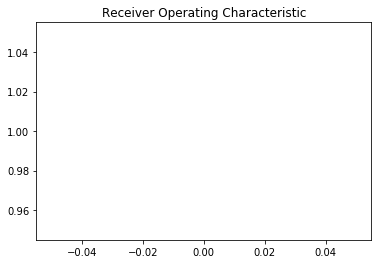

1.0
0.05


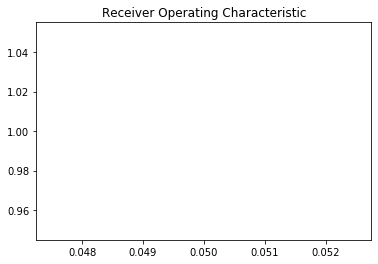

0.9
0.0


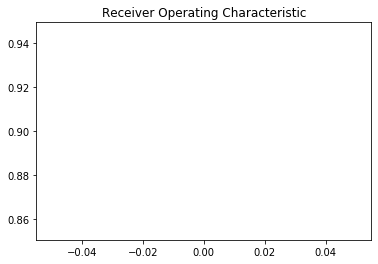

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
# classwise_accuracy = classwise_accuracy(test_actual, predicted,group)
for group in classwise_accuracy1:
    print(group['tpr'])
    print(group['fpr'])
    plt.title('Receiver Operating Characteristic')
    plt.plot(group['fpr'], group['tpr'], label = 'ROC')
    plt.show(block=True)